- Edge detection is an essential technique in image processing and computer vision. 
- It identifies the boundaries of objects within an image, making it particularly useful for this project.
- This notebook explores different edge detection methods and applies them to the dataset.

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import os

import numpy as np
import matplotlib.pyplot as plt

import cv2
from PIL import Image


from utils.config import load_config

### Load data paths from config

In [15]:
config = load_config()
train_dir = config['data_paths']['images_raw']
classes   = os.listdir(train_dir)

### Sobel Edge Detection

In [10]:
def apply_sobel_edge_detection(image_path):
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    
    sobel_x = cv2.Sobel(img_array, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(img_array, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = cv2.sqrt(sobel_x**2 + sobel_y**2)
    
    return sobel_combined

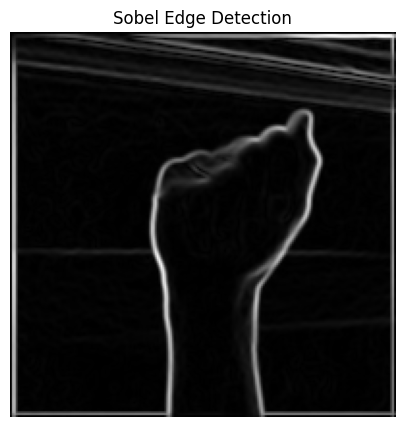

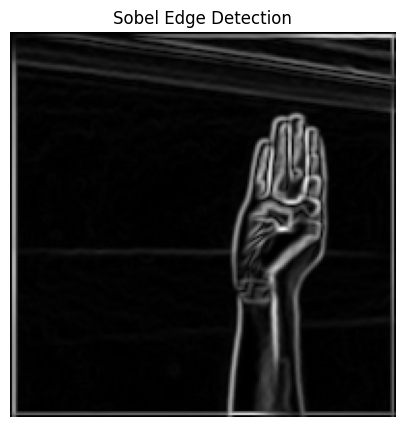

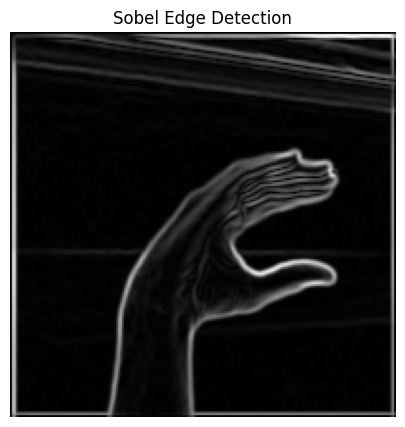

In [12]:
for ch in ['A', 'B', 'C']:
    sample_image_path = os.path.join(train_dir, ch, os.listdir(os.path.join(train_dir, ch))[0])
    sobel_edges = apply_sobel_edge_detection(sample_image_path)
    
    # Plot the result
    plt.figure(figsize=(10, 5))
    plt.imshow(sobel_edges, cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.axis('off')
    plt.show()

### Canny Edge Detection

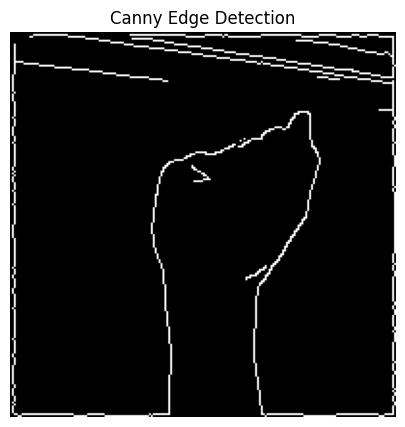

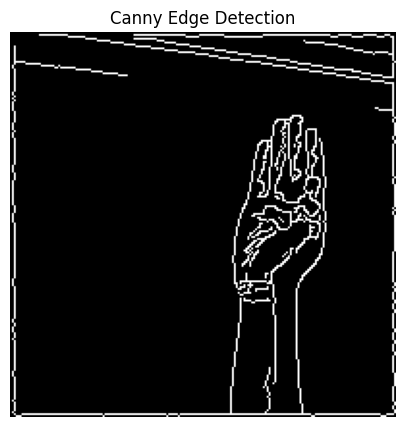

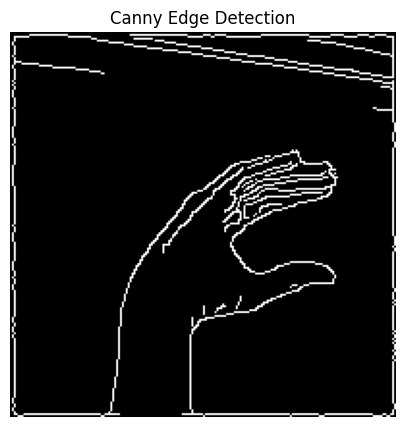

In [13]:
def apply_canny_edge_detection(image_path):
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    
    canny_edges = cv2.Canny(img_array, 100, 200)
    
    return canny_edges


for ch in ['A', 'B', 'C']:
    sample_image_path = os.path.join(train_dir, ch, os.listdir(os.path.join(train_dir, ch))[0])
    canny_edges = apply_canny_edge_detection(sample_image_path)
    
    # Plot the result
    plt.figure(figsize=(10, 5))
    plt.imshow(canny_edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')
    plt.show()

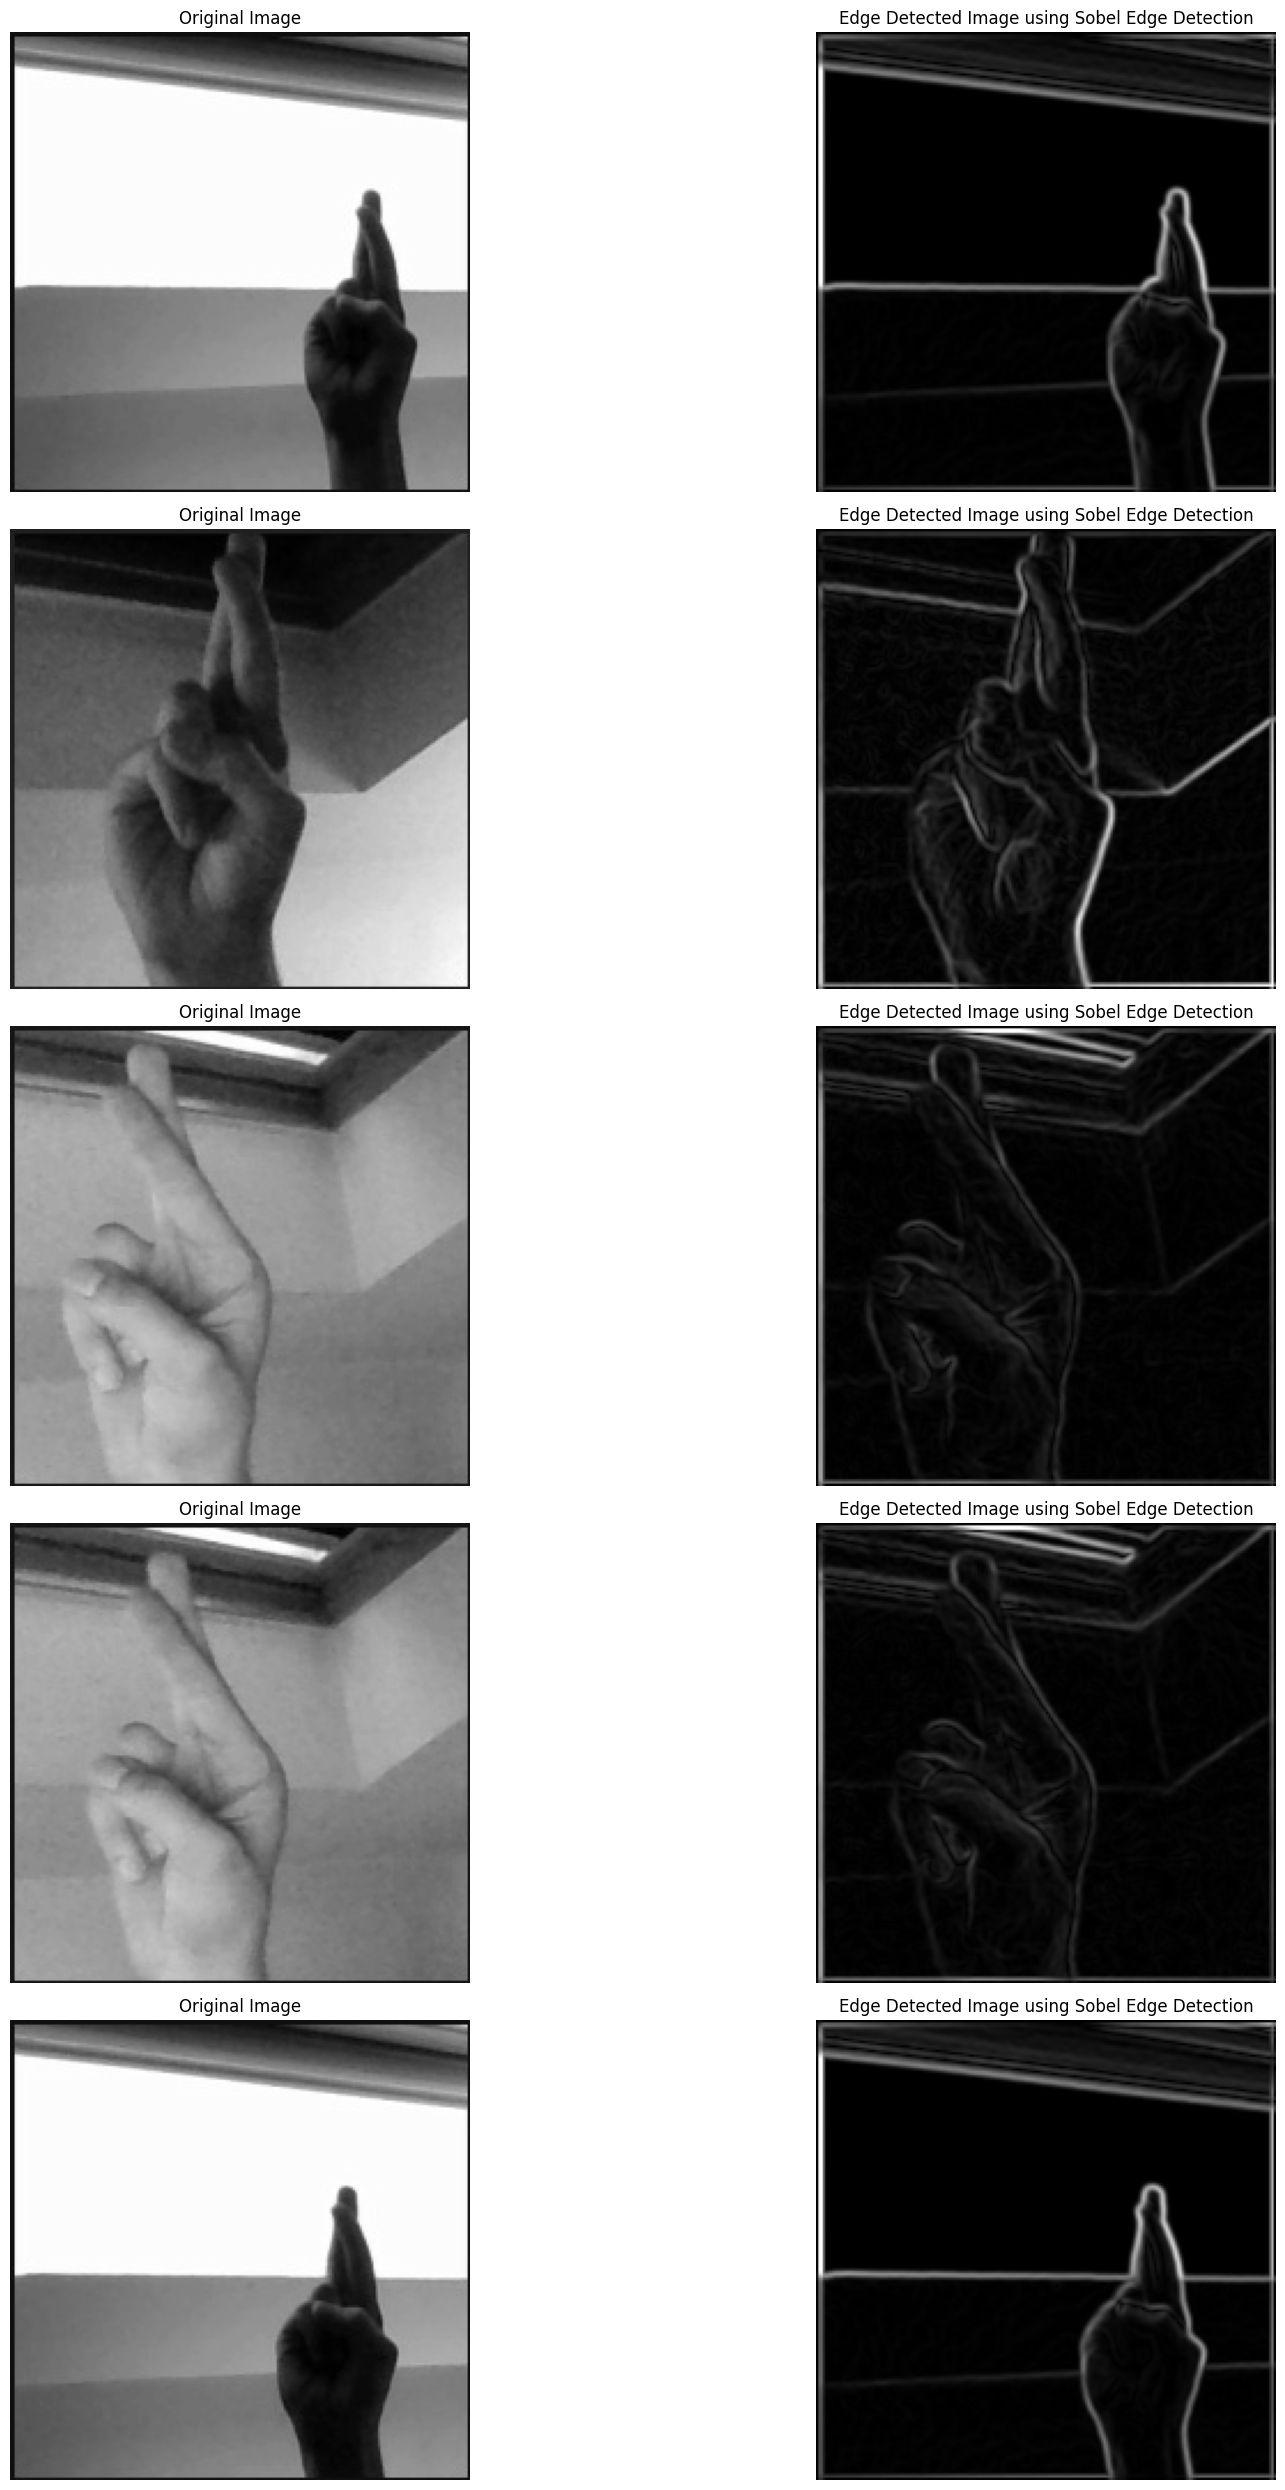

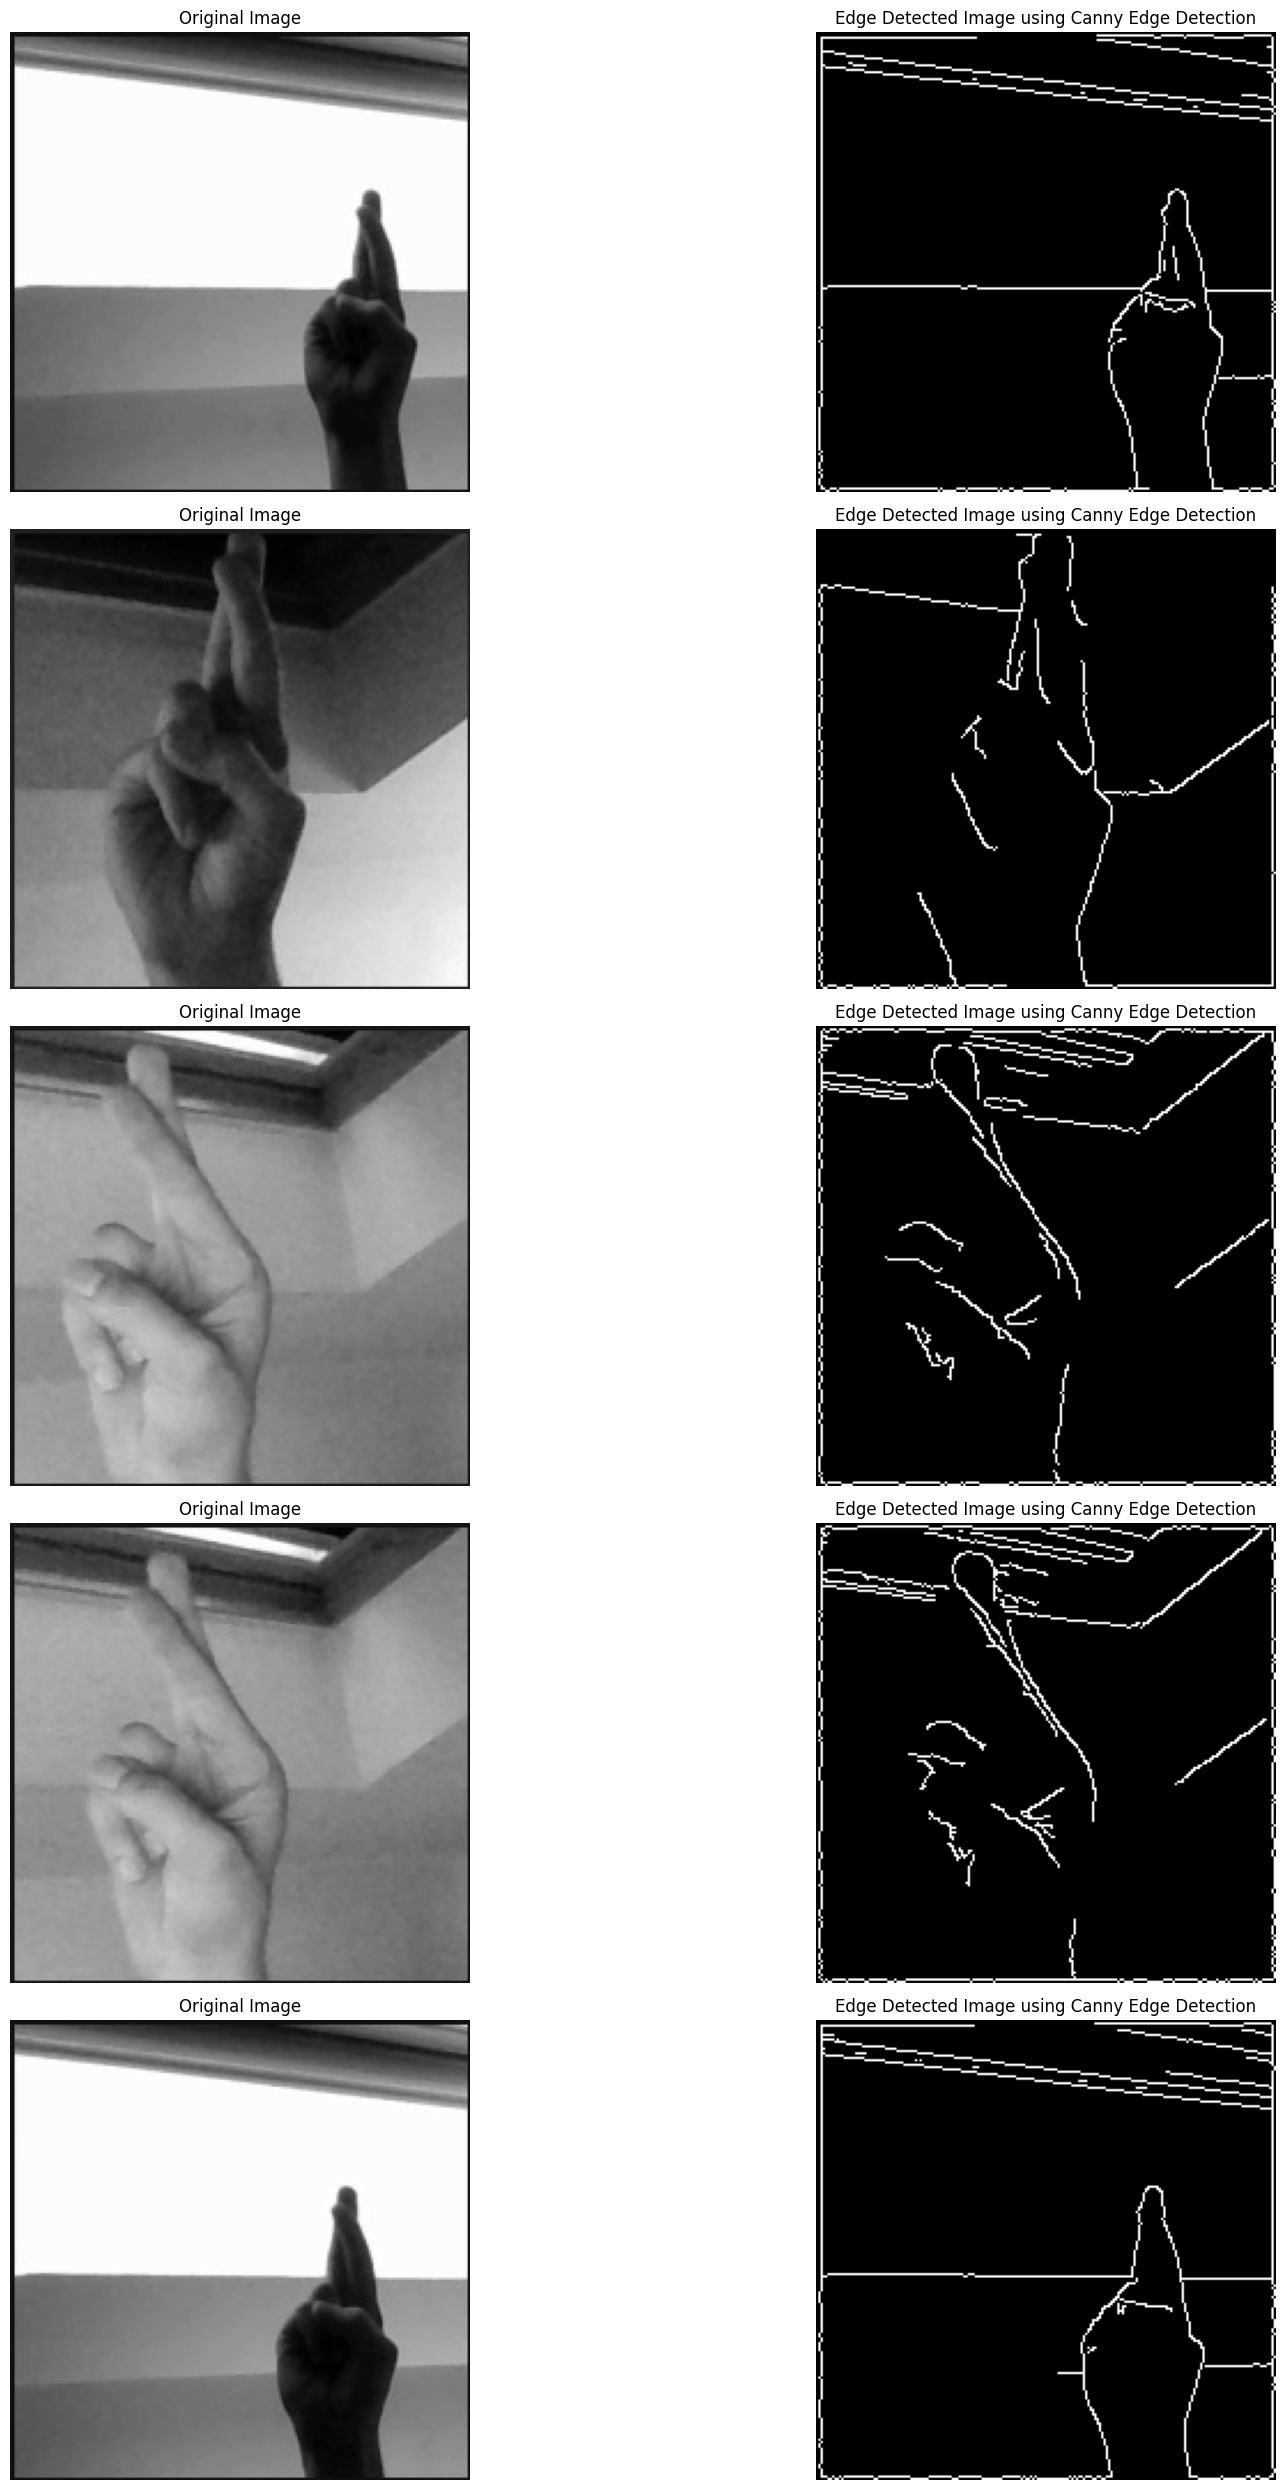

In [19]:
# Apply edge detection to a batch of images and visualize the results
def batch_edge_detection(image_paths, edge_detection_function, detection_method, num_images=5):
    fig, axes = plt.subplots(num_images, 2, figsize=(20, num_images * 5))
    
    for i, image_path in enumerate(image_paths[:num_images]):
        img = Image.open(image_path).convert('L')
        edges = edge_detection_function(image_path)
        
        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].set_title('Original Image')
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(edges, cmap='gray')
        axes[i, 1].set_title(f'Edge Detected Image using {detection_method} Edge Detection')
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Sample a few images from each class
sample_images = []
for cls in classes:
    class_dir = os.path.join(train_dir, cls)
    sample_images.extend([os.path.join(class_dir, img) for img in os.listdir(class_dir)[:5]])

# Apply Sobel edge detection to the batch
batch_edge_detection(sample_images, apply_sobel_edge_detection, detection_method='Sobel')

# Apply Canny edge detection to the batch
batch_edge_detection(sample_images, apply_canny_edge_detection, detection_method='Canny')


- This notebook explored different edge detection techniques, including Sobel and Canny edge detection, and applied them to the dataset. 
- Edge detection helps in identifying the boundaries of objects within images, which is crucial for recognizing hand gestures in ASL. 
- The visualizations demonstrated the effectiveness of these methods in highlighting the edges, providing valuable insights for further image processing and model training.